## 9.2 DataFrame编程

### 9.2.1 创建SparkSession

In [9]:
from pyspark.sql import SparkSession

In [10]:
sqlContext = SparkSession.builder \
     .master("local") \
     .appName("learn dataframe") \
     .config("spark.some.config.option", "some-value") \
     .getOrCreate()

In [11]:
sqlContext

### 9.2.2 创建DataFrame

**>通过 Spark 的数据源创建**

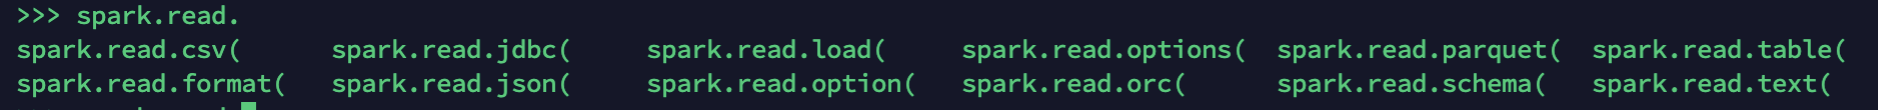

- json文件

In [1]:
pwd = !pwd
data_path = "file://" + list(pwd)[0] + '/data/resources'
print(data_path)

file:///root/pyspark-book/data/resources


In [2]:
spark.read.json(f"{data_path}/people.json")

DataFrame[age: bigint, family: bigint, mobile: string, name: string, score: array<bigint>]

- parquet文件

In [7]:
spark.read.parquet(f"{data_path}/people.parquet")

DataFrame[name: string, favorite_color: string, favorite_numbers: array<int>]

- csv文件

In [14]:
spark.read.csv?

In [8]:
spark.read.csv(f"{data_path}/people.csv", header=True)

DataFrame[ratings: string, age: string, experience: string, family: string, mobile: string]

- orc文件

In [9]:
spark.read.orc(f"{data_path}/people.orc")

DataFrame[name: string, favorite_color: string, favorite_numbers: array<int>]

- txt文件

In [10]:
spark.read.text(f"{data_path}/people.txt")

DataFrame[value: string]

### 9.2.3 展示DataFrame初体验

In [3]:
df = spark.read.json(f"{data_path}/people.json")

In [12]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- family: long (nullable = true)
 |-- mobile: string (nullable = true)
 |-- name: string (nullable = true)
 |-- score: array (nullable = true)
 |    |-- element: long (containsNull = true)



In [13]:
df.show(5)

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
+---+------+------+-------+---------+
only showing top 5 rows



In [14]:
df.rdd.getNumPartitions()

1

In [15]:
df.dtypes

[('age', 'bigint'),
 ('family', 'bigint'),
 ('mobile', 'string'),
 ('name', 'string'),
 ('score', 'array<bigint>')]

In [16]:
# 查看DataFrame基本统计情况

In [17]:
df.describe().show()

+-------+------------------+------------------+------+----+
|summary|               age|            family|mobile|name|
+-------+------------------+------------------+------+----+
|  count|                 7|                 8|     8|   8|
|   mean|22.571428571428573|             5.125|  null|null|
| stddev| 6.924765768773768|1.9594095320493148|  null|null|
|    min|                14|                 3|   TCL|Andy|
|    max|                31|                 9|  vivo|sira|
+-------+------------------+------------------+------+----+



### 9.2.4 使用DataFrame查询数据

In [18]:
df.select("age", "mobile").show(5)

+---+------+
|age|mobile|
+---+------+
| 31|   ios|
| 30| ios15|
| 21| nokia|
| 14|  vivo|
| 14|  vivo|
+---+------+
only showing top 5 rows



In [19]:
df.select("age", "mobile").limit(2).show()

+---+------+
|age|mobile|
+---+------+
| 31|   ios|
| 30| ios15|
+---+------+



In [20]:
df.select(df.age, df.mobile).show(5)

+---+------+
|age|mobile|
+---+------+
| 31|   ios|
| 30| ios15|
| 21| nokia|
| 14|  vivo|
| 14|  vivo|
+---+------+
only showing top 5 rows



In [21]:
df.select(df.age, df.mobile.alias("mo")).show(5)

+---+-----+
|age|   mo|
+---+-----+
| 31|  ios|
| 30|ios15|
| 21|nokia|
| 14| vivo|
| 14| vivo|
+---+-----+
only showing top 5 rows



In [22]:
df.selectExpr("name", "length(mobile)").show()

+-------+--------------+
|   name|length(mobile)|
+-------+--------------+
|Michael|             3|
|   Andy|             5|
| Justin|             5|
|  Berta|             4|
|  Berta|             4|
|   Bela|             5|
|   sira|             3|
|   John|             2|
+-------+--------------+



In [23]:
df.filter("age<28").show()

+---+------+------+------+---------+
|age|family|mobile|  name|    score|
+---+------+------+------+---------+
| 21|     3| nokia|Justin|[3, 5, 6]|
| 14|     6|  vivo| Berta|[2, 3, 6]|
| 14|     6|  vivo| Berta|[2, 3, 6]|
| 26|     3| honor|  Bela|[4, 3, 6]|
| 22|     5|   TCL|  sira|[3, 5, 5]|
+---+------+------+------+---------+



In [24]:
df.where("age<28").show()

+---+------+------+------+---------+
|age|family|mobile|  name|    score|
+---+------+------+------+---------+
| 21|     3| nokia|Justin|[3, 5, 6]|
| 14|     6|  vivo| Berta|[2, 3, 6]|
| 14|     6|  vivo| Berta|[2, 3, 6]|
| 26|     3| honor|  Bela|[4, 3, 6]|
| 22|     5|   TCL|  sira|[3, 5, 5]|
+---+------+------+------+---------+



In [25]:
df.filter("age is not null").show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
+---+------+------+-------+---------+



In [26]:
df.filter(df["family"].between(4,6)).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
+---+------+------+-------+---------+



In [27]:
df.filter("name like '%Be%'").show()

+---+------+------+-----+---------+
|age|family|mobile| name|    score|
+---+------+------+-----+---------+
| 14|     6|  vivo|Berta|[2, 3, 6]|
| 14|     6|  vivo|Berta|[2, 3, 6]|
| 26|     3| honor| Bela|[4, 3, 6]|
+---+------+------+-----+---------+



In [28]:
df.sample(withReplacement=False, fraction=0.5, seed=6).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
+---+------+------+-------+---------+



### 9.2.5 使用DataFrame增加数据

In [29]:
import pyspark.sql.functions as F

In [30]:
# 注意，这俩不能使用 selectExpr

In [31]:
df.select("name", "age", "mobile", (2022-df.age)).show(5)

+-------+---+------+------------+
|   name|age|mobile|(2022 - age)|
+-------+---+------+------------+
|Michael| 31|   ios|        1991|
|   Andy| 30| ios15|        1992|
| Justin| 21| nokia|        2001|
|  Berta| 14|  vivo|        2008|
|  Berta| 14|  vivo|        2008|
+-------+---+------+------------+
only showing top 5 rows



In [32]:
df.withColumn("birth", 2021-df.age).show()

+----+------+------+-------+----------+-----+
| age|family|mobile|   name|     score|birth|
+----+------+------+-------+----------+-----+
|  31|     4|   ios|Michael| [1, 6, 7]| 1990|
|  30|     5| ios15|   Andy| [1, 2, 8]| 1991|
|  21|     3| nokia| Justin| [3, 5, 6]| 2000|
|  14|     6|  vivo|  Berta| [2, 3, 6]| 2007|
|  14|     6|  vivo|  Berta| [2, 3, 6]| 2007|
|  26|     3| honor|   Bela| [4, 3, 6]| 1995|
|  22|     5|   TCL|   sira| [3, 5, 5]| 1999|
|null|     9|    mi|   John|[2, 13, 6]| null|
+----+------+------+-------+----------+-----+



In [33]:
df.withColumn("school", F.lit("high school")).show()

+----+------+------+-------+----------+-----------+
| age|family|mobile|   name|     score|     school|
+----+------+------+-------+----------+-----------+
|  31|     4|   ios|Michael| [1, 6, 7]|high school|
|  30|     5| ios15|   Andy| [1, 2, 8]|high school|
|  21|     3| nokia| Justin| [3, 5, 6]|high school|
|  14|     6|  vivo|  Berta| [2, 3, 6]|high school|
|  14|     6|  vivo|  Berta| [2, 3, 6]|high school|
|  26|     3| honor|   Bela| [4, 3, 6]|high school|
|  22|     5|   TCL|   sira| [3, 5, 5]|high school|
|null|     9|    mi|   John|[2, 13, 6]|high school|
+----+------+------+-------+----------+-----------+



### 9.2.5 使用DataFrame修改数据

In [4]:
df.show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  31|     4|   ios|Michael| [1, 6, 7]|
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  21|     3| nokia| Justin| [3, 5, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  26|     3| honor|   Bela| [4, 3, 6]|
|  22|     5|   TCL|   sira| [3, 5, 5]|
|null|     9|    mi|   John|[2, 13, 6]|
+----+------+------+-------+----------+



In [34]:
df.na.fill(3).show()

+---+------+------+-------+----------+
|age|family|mobile|   name|     score|
+---+------+------+-------+----------+
| 31|     4|   ios|Michael| [1, 6, 7]|
| 30|     5| ios15|   Andy| [1, 2, 8]|
| 21|     3| nokia| Justin| [3, 5, 6]|
| 14|     6|  vivo|  Berta| [2, 3, 6]|
| 14|     6|  vivo|  Berta| [2, 3, 6]|
| 26|     3| honor|   Bela| [4, 3, 6]|
| 22|     5|   TCL|   sira| [3, 5, 5]|
|  3|     9|    mi|   John|[2, 13, 6]|
+---+------+------+-------+----------+



In [35]:
df.select(df.age.alias("birth")).show(5)

+-----+
|birth|
+-----+
|   31|
|   30|
|   21|
|   14|
|   14|
+-----+
only showing top 5 rows



In [36]:
df.select(df.age.cast("float").alias("age")).show(5)

+----+
| age|
+----+
|31.0|
|30.0|
|21.0|
|14.0|
|14.0|
+----+
only showing top 5 rows



In [37]:
df.withColumn("age", df["age"].cast("float")).show(5)

+----+------+------+-------+---------+
| age|family|mobile|   name|    score|
+----+------+------+-------+---------+
|31.0|     4|   ios|Michael|[1, 6, 7]|
|30.0|     5| ios15|   Andy|[1, 2, 8]|
|21.0|     3| nokia| Justin|[3, 5, 6]|
|14.0|     6|  vivo|  Berta|[2, 3, 6]|
|14.0|     6|  vivo|  Berta|[2, 3, 6]|
+----+------+------+-------+---------+
only showing top 5 rows



In [38]:
# 修改某列的所有值

In [39]:
df.withColumn("mobile", F.lit("ios-15")).show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  31|     4|ios-15|Michael| [1, 6, 7]|
|  30|     5|ios-15|   Andy| [1, 2, 8]|
|  21|     3|ios-15| Justin| [3, 5, 6]|
|  14|     6|ios-15|  Berta| [2, 3, 6]|
|  14|     6|ios-15|  Berta| [2, 3, 6]|
|  26|     3|ios-15|   Bela| [4, 3, 6]|
|  22|     5|ios-15|   sira| [3, 5, 5]|
|null|     9|ios-15|   John|[2, 13, 6]|
+----+------+------+-------+----------+



In [40]:
df.withColumnRenamed("mobile", "phone").show()

+----+------+-----+-------+----------+
| age|family|phone|   name|     score|
+----+------+-----+-------+----------+
|  31|     4|  ios|Michael| [1, 6, 7]|
|  30|     5|ios15|   Andy| [1, 2, 8]|
|  21|     3|nokia| Justin| [3, 5, 6]|
|  14|     6| vivo|  Berta| [2, 3, 6]|
|  14|     6| vivo|  Berta| [2, 3, 6]|
|  26|     3|honor|   Bela| [4, 3, 6]|
|  22|     5|  TCL|   sira| [3, 5, 5]|
|null|     9|   mi|   John|[2, 13, 6]|
+----+------+-----+-------+----------+



### 9.2.6 使用DataFrame删除数据

In [41]:
df.na.drop().show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
+---+------+------+-------+---------+



In [42]:
df.dropna(subset=['age']).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
+---+------+------+-------+---------+



In [43]:
df.distinct().show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  21|     3| nokia| Justin| [3, 5, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  22|     5|   TCL|   sira| [3, 5, 5]|
|  26|     3| honor|   Bela| [4, 3, 6]|
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  31|     4|   ios|Michael| [1, 6, 7]|
|null|     9|    mi|   John|[2, 13, 6]|
+----+------+------+-------+----------+



In [7]:
df.dropDuplicates(['family']).show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|null|     9|    mi|   John|[2, 13, 6]|
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  21|     3| nokia| Justin| [3, 5, 6]|
|  31|     4|   ios|Michael| [1, 6, 7]|
+----+------+------+-------+----------+



### 9.2.7 使用DataFrame合并数据

In [45]:
df1 = df.filter("family > 4")
df2 = df.filter("family < 5")

In [46]:
df1.show(), df2.show()

+----+------+------+-----+----------+
| age|family|mobile| name|     score|
+----+------+------+-----+----------+
|  30|     5| ios15| Andy| [1, 2, 8]|
|  14|     6|  vivo|Berta| [2, 3, 6]|
|  14|     6|  vivo|Berta| [2, 3, 6]|
|  22|     5|   TCL| sira| [3, 5, 5]|
|null|     9|    mi| John|[2, 13, 6]|
+----+------+------+-----+----------+

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 26|     3| honor|   Bela|[4, 3, 6]|
+---+------+------+-------+---------+



(None, None)

In [47]:
df1.union(df2).show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  22|     5|   TCL|   sira| [3, 5, 5]|
|null|     9|    mi|   John|[2, 13, 6]|
|  31|     4|   ios|Michael| [1, 6, 7]|
|  21|     3| nokia| Justin| [3, 5, 6]|
|  26|     3| honor|   Bela| [4, 3, 6]|
+----+------+------+-------+----------+



In [48]:
df_n = df.distinct()
df3 = df_n.select("name", "age", "mobile")
df4 = df_n.select("name", "family", "score")

In [49]:
df3.join(df4, df3.name == df4.name, "inner").show()

+-------+----+------+-------+------+----------+
|   name| age|mobile|   name|family|     score|
+-------+----+------+-------+------+----------+
| Justin|  21| nokia| Justin|     3| [3, 5, 6]|
|  Berta|  14|  vivo|  Berta|     6| [2, 3, 6]|
|   sira|  22|   TCL|   sira|     5| [3, 5, 5]|
|   Bela|  26| honor|   Bela|     3| [4, 3, 6]|
|   Andy|  30| ios15|   Andy|     5| [1, 2, 8]|
|Michael|  31|   ios|Michael|     4| [1, 6, 7]|
|   John|null|    mi|   John|     9|[2, 13, 6]|
+-------+----+------+-------+------+----------+



In [50]:
df3.join(df4, ["name"], "inner").show()

+-------+----+------+------+----------+
|   name| age|mobile|family|     score|
+-------+----+------+------+----------+
| Justin|  21| nokia|     3| [3, 5, 6]|
|  Berta|  14|  vivo|     6| [2, 3, 6]|
|   sira|  22|   TCL|     5| [3, 5, 5]|
|   Bela|  26| honor|     3| [4, 3, 6]|
|   Andy|  30| ios15|     5| [1, 2, 8]|
|Michael|  31|   ios|     4| [1, 6, 7]|
|   John|null|    mi|     9|[2, 13, 6]|
+-------+----+------+------+----------+



### 9.2.4 使用DataFrame进阶处理

In [10]:
df = df.na.drop()

In [52]:
# 排序，默认升序

In [53]:
df = df.na.drop()
df.orderBy("age").show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 31|     4|   ios|Michael|[1, 6, 7]|
+---+------+------+-------+---------+



In [54]:
df.orderBy(df.age).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 31|     4|   ios|Michael|[1, 6, 7]|
+---+------+------+-------+---------+



In [11]:
df.orderBy("age", ascending=False).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
+---+------+------+-------+---------+



In [55]:
# F.asc() 升序； F.desc() 降序

In [12]:
df.sort?

In [56]:
df.sort(F.asc("age")).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 31|     4|   ios|Michael|[1, 6, 7]|
+---+------+------+-------+---------+



In [57]:
# 降序

In [13]:
df.orderBy("age", ascending=[0]).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
+---+------+------+-------+---------+



In [59]:
df.orderBy(df.age.desc()).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 31|     4|   ios|Michael|[1, 6, 7]|
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
+---+------+------+-------+---------+



In [60]:
df.orderBy(["name", "age"], ascending=[1,0]).show()

+---+------+------+-------+---------+
|age|family|mobile|   name|    score|
+---+------+------+-------+---------+
| 30|     5| ios15|   Andy|[1, 2, 8]|
| 26|     3| honor|   Bela|[4, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|
| 21|     3| nokia| Justin|[3, 5, 6]|
| 31|     4|   ios|Michael|[1, 6, 7]|
| 22|     5|   TCL|   sira|[3, 5, 5]|
+---+------+------+-------+---------+



In [61]:
# 分组处理

In [62]:
df.groupBy("family").count().show()

+------+-----+
|family|count|
+------+-----+
|     6|    2|
|     5|    2|
|     3|    2|
|     4|    1|
+------+-----+



In [63]:
df.groupBy("family").agg({"mobile":"count"}).show()

+------+-------------+
|family|count(mobile)|
+------+-------------+
|     6|            2|
|     5|            2|
|     3|            2|
|     4|            1|
+------+-------------+



In [64]:
df.groupBy("family").agg(F.max("age"), F.avg("age")).show()

+------+--------+--------+
|family|max(age)|avg(age)|
+------+--------+--------+
|     6|      14|    14.0|
|     5|      30|    26.0|
|     3|      26|    23.5|
|     4|      31|    31.0|
+------+--------+--------+



In [65]:
df.groupBy("family").agg(F.collect_list("name")).show()

+------+------------------+
|family|collect_list(name)|
+------+------------------+
|     6|    [Berta, Berta]|
|     5|      [Andy, sira]|
|     3|    [Justin, Bela]|
|     4|         [Michael]|
+------+------------------+



In [66]:
df.groupBy("family").agg(F.collect_set("name")).show()

+------+-----------------+
|family|collect_set(name)|
+------+-----------------+
|     6|          [Berta]|
|     5|     [Andy, sira]|
|     3|   [Bela, Justin]|
|     4|        [Michael]|
+------+-----------------+



In [67]:
# 交叉分析

In [68]:
df.stat.crosstab("name", "age").show()

+--------+---+---+---+---+---+---+
|name_age| 14| 21| 22| 26| 30| 31|
+--------+---+---+---+---+---+---+
|    Bela|  0|  0|  0|  1|  0|  0|
|    Andy|  0|  0|  0|  0|  1|  0|
| Michael|  0|  0|  0|  0|  0|  1|
|  Justin|  0|  1|  0|  0|  0|  0|
|   Berta|  2|  0|  0|  0|  0|  0|
|    sira|  0|  0|  1|  0|  0|  0|
+--------+---+---+---+---+---+---+



In [69]:
# 统计各列非空数据的数量

In [70]:
df.agg(*[F.count(c).alias(c) for c in df.columns]).show()

+---+------+------+----+-----+
|age|family|mobile|name|score|
+---+------+------+----+-----+
|  7|     7|     7|   7|    7|
+---+------+------+----+-----+



In [71]:
# 列传多行

In [72]:
df.select("name", "score", F.explode("score")).show()

+-------+---------+---+
|   name|    score|col|
+-------+---------+---+
|Michael|[1, 6, 7]|  1|
|Michael|[1, 6, 7]|  6|
|Michael|[1, 6, 7]|  7|
|   Andy|[1, 2, 8]|  1|
|   Andy|[1, 2, 8]|  2|
|   Andy|[1, 2, 8]|  8|
| Justin|[3, 5, 6]|  3|
| Justin|[3, 5, 6]|  5|
| Justin|[3, 5, 6]|  6|
|  Berta|[2, 3, 6]|  2|
|  Berta|[2, 3, 6]|  3|
|  Berta|[2, 3, 6]|  6|
|  Berta|[2, 3, 6]|  2|
|  Berta|[2, 3, 6]|  3|
|  Berta|[2, 3, 6]|  6|
|   Bela|[4, 3, 6]|  4|
|   Bela|[4, 3, 6]|  3|
|   Bela|[4, 3, 6]|  6|
|   sira|[3, 5, 5]|  3|
|   sira|[3, 5, 5]|  5|
+-------+---------+---+
only showing top 20 rows



In [73]:
df.withColumn(
    "jsonCol", F.to_json(F.struct([df.name, df.age]))
).show(truncate=False)

+---+------+------+-------+---------+---------------------------+
|age|family|mobile|name   |score    |jsonCol                    |
+---+------+------+-------+---------+---------------------------+
|31 |4     |ios   |Michael|[1, 6, 7]|{"name":"Michael","age":31}|
|30 |5     |ios15 |Andy   |[1, 2, 8]|{"name":"Andy","age":30}   |
|21 |3     |nokia |Justin |[3, 5, 6]|{"name":"Justin","age":21} |
|14 |6     |vivo  |Berta  |[2, 3, 6]|{"name":"Berta","age":14}  |
|14 |6     |vivo  |Berta  |[2, 3, 6]|{"name":"Berta","age":14}  |
|26 |3     |honor |Bela   |[4, 3, 6]|{"name":"Bela","age":26}   |
|22 |5     |TCL   |sira   |[3, 5, 5]|{"name":"sira","age":22}   |
+---+------+------+-------+---------+---------------------------+



In [74]:
df.select(
    "*", 
    F.to_json(F.struct([df.name, df.age])).alias("jsonCol")
).show(truncate=False)

+---+------+------+-------+---------+---------------------------+
|age|family|mobile|name   |score    |jsonCol                    |
+---+------+------+-------+---------+---------------------------+
|31 |4     |ios   |Michael|[1, 6, 7]|{"name":"Michael","age":31}|
|30 |5     |ios15 |Andy   |[1, 2, 8]|{"name":"Andy","age":30}   |
|21 |3     |nokia |Justin |[3, 5, 6]|{"name":"Justin","age":21} |
|14 |6     |vivo  |Berta  |[2, 3, 6]|{"name":"Berta","age":14}  |
|14 |6     |vivo  |Berta  |[2, 3, 6]|{"name":"Berta","age":14}  |
|26 |3     |honor |Bela   |[4, 3, 6]|{"name":"Bela","age":26}   |
|22 |5     |TCL   |sira   |[3, 5, 5]|{"name":"sira","age":22}   |
+---+------+------+-------+---------+---------------------------+



In [75]:
df.select(
    "name", 
    F.to_json(F.struct([df[c] for c in df.columns])).alias("jsonCol")
).show(truncate=False)

+-------+----------------------------------------------------------------------+
|name   |jsonCol                                                               |
+-------+----------------------------------------------------------------------+
|Michael|{"age":31,"family":4,"mobile":"ios","name":"Michael","score":[1,6,7]} |
|Andy   |{"age":30,"family":5,"mobile":"ios15","name":"Andy","score":[1,2,8]}  |
|Justin |{"age":21,"family":3,"mobile":"nokia","name":"Justin","score":[3,5,6]}|
|Berta  |{"age":14,"family":6,"mobile":"vivo","name":"Berta","score":[2,3,6]}  |
|Berta  |{"age":14,"family":6,"mobile":"vivo","name":"Berta","score":[2,3,6]}  |
|Bela   |{"age":26,"family":3,"mobile":"honor","name":"Bela","score":[4,3,6]}  |
|sira   |{"age":22,"family":5,"mobile":"TCL","name":"sira","score":[3,5,5]}    |
+-------+----------------------------------------------------------------------+



In [76]:
# apply

In [77]:
def func(row):
    print("name is :", row["name"], "age is :", row["age"])

df.rdd.foreach(func)

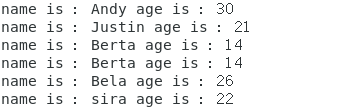

In [78]:
df.rdd.map(lambda row : (row["age"], row["age"]*10)).take(5)

[(31, 310), (30, 300), (21, 210), (14, 140), (14, 140)]

In [79]:
df_out = df.rdd.map(lambda row : (row["age"], row["age"]*10)).toDF(["age", "10_age"])
df_out.show()

+---+------+
|age|10_age|
+---+------+
| 31|   310|
| 30|   300|
| 21|   210|
| 14|   140|
| 14|   140|
| 26|   260|
| 22|   220|
+---+------+



### 9.2.4 自定义UDF函数

In [80]:
from pyspark.sql.types import *

def one_udf(name):
    return name +":"+ name.lower()

name_udf = F.udf(one_udf, StringType())

df.withColumn("full_name", name_udf("name")).show()

+---+------+------+-------+---------+---------------+
|age|family|mobile|   name|    score|      full_name|
+---+------+------+-------+---------+---------------+
| 31|     4|   ios|Michael|[1, 6, 7]|Michael:michael|
| 30|     5| ios15|   Andy|[1, 2, 8]|      Andy:andy|
| 21|     3| nokia| Justin|[3, 5, 6]|  Justin:justin|
| 14|     6|  vivo|  Berta|[2, 3, 6]|    Berta:berta|
| 14|     6|  vivo|  Berta|[2, 3, 6]|    Berta:berta|
| 26|     3| honor|   Bela|[4, 3, 6]|      Bela:bela|
| 22|     5|   TCL|   sira|[3, 5, 5]|      sira:sira|
+---+------+------+-------+---------+---------------+



In [81]:
def two_udf(name, age):
    return [name, age]

con_udf = F.udf(two_udf)

df.withColumn("full_info", con_udf("name", "age")).show()

+---+------+------+-------+---------+-------------+
|age|family|mobile|   name|    score|    full_info|
+---+------+------+-------+---------+-------------+
| 31|     4|   ios|Michael|[1, 6, 7]|[Michael, 31]|
| 30|     5| ios15|   Andy|[1, 2, 8]|   [Andy, 30]|
| 21|     3| nokia| Justin|[3, 5, 6]| [Justin, 21]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|  [Berta, 14]|
| 14|     6|  vivo|  Berta|[2, 3, 6]|  [Berta, 14]|
| 26|     3| honor|   Bela|[4, 3, 6]|   [Bela, 26]|
| 22|     5|   TCL|   sira|[3, 5, 5]|   [sira, 22]|
+---+------+------+-------+---------+-------------+



In [82]:
# 数据保存

In [83]:
df.select("name", "age").write.csv(f"{data_path}/"+"out_csv", mode="overwrite")

In [84]:
!ls -l data/resources/out_csv

总用量 4
-rw-r--r--. 1 root root 63 2月   5 20:12 part-00000-08b9d9a2-7cc7-4162-8d26-ba97f519d966-c000.csv
-rw-r--r--. 1 root root  0 2月   5 20:12 _SUCCESS


In [85]:
df.write.parquet(f"{data_path}/"+"out_pqt", mode="overwrite")

In [86]:
!ls -l data/resources/out_pqt

总用量 4
-rw-r--r--. 1 root root 1689 2月   5 20:12 part-00000-4f4c5639-562a-4a47-b2f1-962465227a87-c000.snappy.parquet
-rw-r--r--. 1 root root    0 2月   5 20:12 _SUCCESS


### 9.2.6 DataFrame与RDD的交互

**RDD -> DataFrame**

In [87]:
rdd = sc.parallelize([('Jones', 23), ('Tim', 18), ('Jane', 50), ('Mike',23), ('Trump', 13)])
rdd.collect()

[('Jones', 23), ('Tim', 18), ('Jane', 50), ('Mike', 23), ('Trump', 13)]

In [88]:
df = spark.createDataFrame(rdd)

In [89]:
df.show()

+-----+---+
|   _1| _2|
+-----+---+
|Jones| 23|
|  Tim| 18|
| Jane| 50|
| Mike| 23|
|Trump| 13|
+-----+---+



In [90]:
df = spark.createDataFrame(rdd, schema=["name", "age"])
df.show()

+-----+---+
| name|age|
+-----+---+
|Jones| 23|
|  Tim| 18|
| Jane| 50|
| Mike| 23|
|Trump| 13|
+-----+---+



In [91]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [19]:
# whether the field can be null (None) or not.

In [92]:
schema = StructType([
      StructField('name', StringType(), True), 
      StructField('age', IntegerType(), True),
])
df = spark.createDataFrame(rdd, schema)
df.show()

+-----+---+
| name|age|
+-----+---+
|Jones| 23|
|  Tim| 18|
| Jane| 50|
| Mike| 23|
|Trump| 13|
+-----+---+



In [93]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)



In [94]:
df = rdd.toDF(schema=["name", "age"])
df.show()

+-----+---+
| name|age|
+-----+---+
|Jones| 23|
|  Tim| 18|
| Jane| 50|
| Mike| 23|
|Trump| 13|
+-----+---+



**DataFrame -> RDD**

In [95]:
rdd = df.rdd
rdd.collect()

[Row(name='Jones', age=23),
 Row(name='Tim', age=18),
 Row(name='Jane', age=50),
 Row(name='Mike', age=23),
 Row(name='Trump', age=13)]

> 说明:
>	得到的RDD中存储的数据类型是:Row

## 9.3 Spark SQL编程

In [96]:
### 9.3.2 使用Spark SQL查询数据
### 9.3.3 使用Spark SQL增加数据
### 9.3.4 使用Spark SQL修改数据
### 9.3.5 使用Spark SQL删除数据
### 9.3.6 使用Spark SQL合并数据
### 9.3.7 使用Spark SQL统计数据
### 9.3.8 使用Spark SQL去重数据

### 9.3.1 Spark SQL数据源创建

In [97]:
### 方法一：从 DataFrame 创建

In [4]:
df = spark.read.json(f"{data_path}/people.json")

In [5]:
df.registerTempTable("people_table")

In [6]:
sqlContext.sql("""
    SELECT 
        *  
    FROM 
    people_table
""").show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  31|     4|   ios|Michael| [1, 6, 7]|
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  21|     3| nokia| Justin| [3, 5, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  26|     3| honor|   Bela| [4, 3, 6]|
|  22|     5|   TCL|   sira| [3, 5, 5]|
|null|     9|    mi|   John|[2, 13, 6]|
+----+------+------+-------+----------+



In [101]:
### 方法二：在文件上执行运行

In [102]:
# json表示文件的格式, '.' 后面的文件具体路径需要用反引号括起来

In [106]:
sqlContext.sql("""
    SELECT 
        *  
    FROM 
    json.`file:///root/pyspark-book/data/resources/people.json`
""").show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  31|     4|   ios|Michael| [1, 6, 7]|
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  21|     3| nokia| Justin| [3, 5, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  26|     3| honor|   Bela| [4, 3, 6]|
|  22|     5|   TCL|   sira| [3, 5, 5]|
|null|     9|    mi|   John|[2, 13, 6]|
+----+------+------+-------+----------+



### 9.3.2	使用Spark SQL查询数据

In [107]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family
    FROM 
    people_table
""").show(5)

+-------+---+------+
|   name|age|family|
+-------+---+------+
|Michael| 31|     4|
|   Andy| 30|     5|
| Justin| 21|     3|
|  Berta| 14|     6|
|  Berta| 14|     6|
+-------+---+------+
only showing top 5 rows



In [108]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family
    FROM 
    people_table
    LIMIT 5
""").show()

+-------+---+------+
|   name|age|family|
+-------+---+------+
|Michael| 31|     4|
|   Andy| 30|     5|
| Justin| 21|     3|
|  Berta| 14|     6|
|  Berta| 14|     6|
+-------+---+------+



In [109]:
sqlContext.sql("""
    SELECT 
        name,
        age AS age_new,
        family
    FROM 
    people_table
    LIMIT 5
""").show()

+-------+-------+------+
|   name|age_new|family|
+-------+-------+------+
|Michael|     31|     4|
|   Andy|     30|     5|
| Justin|     21|     3|
|  Berta|     14|     6|
|  Berta|     14|     6|
+-------+-------+------+



In [110]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family,
        length(name)
    FROM 
    people_table
    LIMIT 5
""").show()

+-------+---+------+------------+
|   name|age|family|length(name)|
+-------+---+------+------------+
|Michael| 31|     4|           7|
|   Andy| 30|     5|           4|
| Justin| 21|     3|           6|
|  Berta| 14|     6|           5|
|  Berta| 14|     6|           5|
+-------+---+------+------------+



In [111]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family
    FROM 
    people_table
    WHERE age < 28
""").show()

+------+---+------+
|  name|age|family|
+------+---+------+
|Justin| 21|     3|
| Berta| 14|     6|
| Berta| 14|     6|
|  Bela| 26|     3|
|  sira| 22|     5|
+------+---+------+



### 9.3.3 增加数据

In [112]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family,
        2022 - age
    FROM 
    people_table
""").show()

+-------+----+------+----------------------------+
|   name| age|family|(CAST(2022 AS BIGINT) - age)|
+-------+----+------+----------------------------+
|Michael|  31|     4|                        1991|
|   Andy|  30|     5|                        1992|
| Justin|  21|     3|                        2001|
|  Berta|  14|     6|                        2008|
|  Berta|  14|     6|                        2008|
|   Bela|  26|     3|                        1996|
|   sira|  22|     5|                        2000|
|   John|null|     9|                        null|
+-------+----+------+----------------------------+



In [113]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family,
        (2022 - age) as birth
    FROM 
    people_table
""").show()

+-------+----+------+-----+
|   name| age|family|birth|
+-------+----+------+-----+
|Michael|  31|     4| 1991|
|   Andy|  30|     5| 1992|
| Justin|  21|     3| 2001|
|  Berta|  14|     6| 2008|
|  Berta|  14|     6| 2008|
|   Bela|  26|     3| 1996|
|   sira|  22|     5| 2000|
|   John|null|     9| null|
+-------+----+------+-----+



### 9.3.5 使用Spark SQL修改数据

In [8]:
sqlContext.sql("""
    SELECT 
        name,
        family,
        CASE WHEN
            age is null then 666
            else age
        END AS age
    FROM 
    people_table
""").show()

+-------+------+---+
|   name|family|age|
+-------+------+---+
|Michael|     4| 31|
|   Andy|     5| 30|
| Justin|     3| 21|
|  Berta|     6| 14|
|  Berta|     6| 14|
|   Bela|     3| 26|
|   sira|     5| 22|
|   John|     9|666|
+-------+------+---+



In [115]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family,
        age as birth
    FROM 
    people_table
""").show()

+-------+----+------+-----+
|   name| age|family|birth|
+-------+----+------+-----+
|Michael|  31|     4|   31|
|   Andy|  30|     5|   30|
| Justin|  21|     3|   21|
|  Berta|  14|     6|   14|
|  Berta|  14|     6|   14|
|   Bela|  26|     3|   26|
|   sira|  22|     5|   22|
|   John|null|     9| null|
+-------+----+------+-----+



In [116]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family,
        CAST(age AS FLOAT)
    FROM 
    people_table
""").show()

+-------+----+------+----+
|   name| age|family| age|
+-------+----+------+----+
|Michael|  31|     4|31.0|
|   Andy|  30|     5|30.0|
| Justin|  21|     3|21.0|
|  Berta|  14|     6|14.0|
|  Berta|  14|     6|14.0|
|   Bela|  26|     3|26.0|
|   sira|  22|     5|22.0|
|   John|null|     9|null|
+-------+----+------+----+



In [117]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family,
        'high school' AS school
    FROM 
    people_table
""")\
.show()

+-------+----+------+-----------+
|   name| age|family|     school|
+-------+----+------+-----------+
|Michael|  31|     4|high school|
|   Andy|  30|     5|high school|
| Justin|  21|     3|high school|
|  Berta|  14|     6|high school|
|  Berta|  14|     6|high school|
|   Bela|  26|     3|high school|
|   sira|  22|     5|high school|
|   John|null|     9|high school|
+-------+----+------+-----------+



In [118]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family
    FROM 
    people_table
""")\
.withColumn("school", F.lit("high school"))\
.show()

+-------+----+------+-----------+
|   name| age|family|     school|
+-------+----+------+-----------+
|Michael|  31|     4|high school|
|   Andy|  30|     5|high school|
| Justin|  21|     3|high school|
|  Berta|  14|     6|high school|
|  Berta|  14|     6|high school|
|   Bela|  26|     3|high school|
|   sira|  22|     5|high school|
|   John|null|     9|high school|
+-------+----+------+-----------+



In [119]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family
    FROM 
    people_table
""")\
.withColumnRenamed("age", "birth")\
.show()

+-------+-----+------+
|   name|birth|family|
+-------+-----+------+
|Michael|   31|     4|
|   Andy|   30|     5|
| Justin|   21|     3|
|  Berta|   14|     6|
|  Berta|   14|     6|
|   Bela|   26|     3|
|   sira|   22|     5|
|   John| null|     9|
+-------+-----+------+



In [9]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family,
        INITCAP(mobile) AS mobile
    FROM 
    people_table
""").show()

+-------+----+------+------+
|   name| age|family|mobile|
+-------+----+------+------+
|Michael|  31|     4|   Ios|
|   Andy|  30|     5| Ios15|
| Justin|  21|     3| Nokia|
|  Berta|  14|     6|  Vivo|
|  Berta|  14|     6|  Vivo|
|   Bela|  26|     3| Honor|
|   sira|  22|     5|   Tcl|
|   John|null|     9|    Mi|
+-------+----+------+------+



### 9.3.5 使用Spark SQL删除数据

In [121]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family
    FROM 
    people_table
    WHERE age > 20
""").show()

+-------+---+------+
|   name|age|family|
+-------+---+------+
|Michael| 31|     4|
|   Andy| 30|     5|
| Justin| 21|     3|
|   Bela| 26|     3|
|   sira| 22|     5|
+-------+---+------+



In [122]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family
    FROM 
    people_table
    WHERE age is not null
""").show()

+-------+---+------+
|   name|age|family|
+-------+---+------+
|Michael| 31|     4|
|   Andy| 30|     5|
| Justin| 21|     3|
|  Berta| 14|     6|
|  Berta| 14|     6|
|   Bela| 26|     3|
|   sira| 22|     5|
+-------+---+------+



In [123]:
sqlContext.sql("""
    SELECT 
        name,
        age,
        family
    FROM 
    people_table
""")\
.na.drop()\
.show()

+-------+---+------+
|   name|age|family|
+-------+---+------+
|Michael| 31|     4|
|   Andy| 30|     5|
| Justin| 21|     3|
|  Berta| 14|     6|
|  Berta| 14|     6|
|   Bela| 26|     3|
|   sira| 22|     5|
+-------+---+------+



In [124]:
sqlContext.sql("""
    SELECT 
        distinct *
    FROM 
    people_table
""")\
.show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  21|     3| nokia| Justin| [3, 5, 6]|
|  31|     4|   ios|Michael| [1, 6, 7]|
|  22|     5|   TCL|   sira| [3, 5, 5]|
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  26|     3| honor|   Bela| [4, 3, 6]|
|null|     9|    mi|   John|[2, 13, 6]|
+----+------+------+-------+----------+



### 9.3.6 使用Spark SQL合并数据

In [125]:
df_n = df.distinct()
df_n.registerTempTable("people_unique")

In [126]:
sqlContext.sql("""
    SELECT 
       name, 
       age, 
       mobile
    FROM 
    people_unique
""").registerTempTable("table1")

sqlContext.sql("""
    SELECT 
       name, 
       family, 
       score
    FROM 
    people_unique
""").registerTempTable("table2")

In [127]:
sqlContext.sql("""
    SELECT 
        *
    FROM table1 AS t1
    LEFT JOIN table2 AS t2
    ON t1.name == t2.name
    WHERE age is not null
""").show()

+-------+---+------+-------+------+---------+
|   name|age|mobile|   name|family|    score|
+-------+---+------+-------+------+---------+
| Justin| 21| nokia| Justin|     3|[3, 5, 6]|
|  Berta| 14|  vivo|  Berta|     6|[2, 3, 6]|
|   sira| 22|   TCL|   sira|     5|[3, 5, 5]|
|   Bela| 26| honor|   Bela|     3|[4, 3, 6]|
|   Andy| 30| ios15|   Andy|     5|[1, 2, 8]|
|Michael| 31|   ios|Michael|     4|[1, 6, 7]|
+-------+---+------+-------+------+---------+



In [129]:
sqlContext.sql("""
    SELECT 
        *,
        concat_ws('-', name, age) AS info
    FROM 
    people_unique
    WHERE age is not null
""").show()

+---+------+------+-------+---------+----------+
|age|family|mobile|   name|    score|      info|
+---+------+------+-------+---------+----------+
| 21|     3| nokia| Justin|[3, 5, 6]| Justin-21|
| 14|     6|  vivo|  Berta|[2, 3, 6]|  Berta-14|
| 22|     5|   TCL|   sira|[3, 5, 5]|   sira-22|
| 26|     3| honor|   Bela|[4, 3, 6]|   Bela-26|
| 30|     5| ios15|   Andy|[1, 2, 8]|   Andy-30|
| 31|     4|   ios|Michael|[1, 6, 7]|Michael-31|
+---+------+------+-------+---------+----------+



### 9.3.6 进阶处理

In [130]:

# 交叉分析
# 统计各列非空数据的数量
# 列传多行

In [131]:
# 排序，默认升序

In [132]:
sqlContext.sql("""
    SELECT 
        *
    FROM 
    people_table
    ORDER BY age
""").show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|null|     9|    mi|   John|[2, 13, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  21|     3| nokia| Justin| [3, 5, 6]|
|  22|     5|   TCL|   sira| [3, 5, 5]|
|  26|     3| honor|   Bela| [4, 3, 6]|
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  31|     4|   ios|Michael| [1, 6, 7]|
+----+------+------+-------+----------+



In [133]:
# 降序

In [134]:
sqlContext.sql("""
    SELECT 
        *
    FROM 
    people_table
    ORDER BY age DESC
""").show()

+----+------+------+-------+----------+
| age|family|mobile|   name|     score|
+----+------+------+-------+----------+
|  31|     4|   ios|Michael| [1, 6, 7]|
|  30|     5| ios15|   Andy| [1, 2, 8]|
|  26|     3| honor|   Bela| [4, 3, 6]|
|  22|     5|   TCL|   sira| [3, 5, 5]|
|  21|     3| nokia| Justin| [3, 5, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|
|null|     9|    mi|   John|[2, 13, 6]|
+----+------+------+-------+----------+



In [135]:
# 分组处理

In [136]:
sqlContext.sql("""
    SELECT 
        family,
        count(1)
    FROM 
    people_table
    GROUP BY family
""").show()

+------+--------+
|family|count(1)|
+------+--------+
|     6|       2|
|     9|       1|
|     5|       2|
|     3|       2|
|     4|       1|
+------+--------+



In [137]:
sqlContext.sql("""
    SELECT 
        family,
        count(mobile)
    FROM 
    people_table
    GROUP BY family
""").show()

+------+-------------+
|family|count(mobile)|
+------+-------------+
|     6|            2|
|     9|            1|
|     5|            2|
|     3|            2|
|     4|            1|
+------+-------------+



In [138]:
sqlContext.sql("""
    SELECT 
        family,
        COLLECT_LIST(name)
    FROM 
    people_table
    GROUP BY family
""").show()

+------+------------------+
|family|collect_list(name)|
+------+------------------+
|     6|    [Berta, Berta]|
|     9|            [John]|
|     5|      [Andy, sira]|
|     3|    [Justin, Bela]|
|     4|         [Michael]|
+------+------------------+



In [139]:
sqlContext.sql("""
    SELECT 
        family,
        COLLECT_SET(name)
    FROM 
    people_table
    GROUP BY family
""").show()

+------+-----------------+
|family|collect_set(name)|
+------+-----------------+
|     6|          [Berta]|
|     9|           [John]|
|     5|     [Andy, sira]|
|     3|   [Bela, Justin]|
|     4|        [Michael]|
+------+-----------------+



In [140]:
# 列传多行

In [141]:
sqlContext.sql("""
    SELECT 
        name,
        score,
        EXPLODE(score) AS col
    FROM 
    people_unique
""").show()

+-------+----------+---+
|   name|     score|col|
+-------+----------+---+
| Justin| [3, 5, 6]|  3|
| Justin| [3, 5, 6]|  5|
| Justin| [3, 5, 6]|  6|
|  Berta| [2, 3, 6]|  2|
|  Berta| [2, 3, 6]|  3|
|  Berta| [2, 3, 6]|  6|
|   sira| [3, 5, 5]|  3|
|   sira| [3, 5, 5]|  5|
|   sira| [3, 5, 5]|  5|
|   Bela| [4, 3, 6]|  4|
|   Bela| [4, 3, 6]|  3|
|   Bela| [4, 3, 6]|  6|
|   Andy| [1, 2, 8]|  1|
|   Andy| [1, 2, 8]|  2|
|   Andy| [1, 2, 8]|  8|
|Michael| [1, 6, 7]|  1|
|Michael| [1, 6, 7]|  6|
|Michael| [1, 6, 7]|  7|
|   John|[2, 13, 6]|  2|
|   John|[2, 13, 6]| 13|
+-------+----------+---+
only showing top 20 rows



In [142]:
# 转换 json

In [143]:
sqlContext.sql("""
    SELECT 
        *,
        TO_JSON(MAP("NAME" , name, "AGE", age)) AS json
    FROM 
    people_table
""").show(truncate=False)

+----+------+------+-------+----------+-----------------------------+
|age |family|mobile|name   |score     |json                         |
+----+------+------+-------+----------+-----------------------------+
|31  |4     |ios   |Michael|[1, 6, 7] |{"NAME":"Michael","AGE":"31"}|
|30  |5     |ios15 |Andy   |[1, 2, 8] |{"NAME":"Andy","AGE":"30"}   |
|21  |3     |nokia |Justin |[3, 5, 6] |{"NAME":"Justin","AGE":"21"} |
|14  |6     |vivo  |Berta  |[2, 3, 6] |{"NAME":"Berta","AGE":"14"}  |
|14  |6     |vivo  |Berta  |[2, 3, 6] |{"NAME":"Berta","AGE":"14"}  |
|26  |3     |honor |Bela   |[4, 3, 6] |{"NAME":"Bela","AGE":"26"}   |
|22  |5     |TCL   |sira   |[3, 5, 5] |{"NAME":"sira","AGE":"22"}   |
|null|9     |mi    |John   |[2, 13, 6]|{"NAME":"John","AGE":null}   |
+----+------+------+-------+----------+-----------------------------+



### 9.3.7 自定义UDF函数

In [144]:
def one_udf(name):
    return name +":"+ name.lower()

In [145]:
spark.udf.register("name_udf", one_udf, StringType())

<function __main__.one_udf(name)>

In [146]:
sqlContext.sql("""
    SELECT 
        *,
        name_udf(name) AS full_name
    FROM 
    people_table
""").show()

+----+------+------+-------+----------+---------------+
| age|family|mobile|   name|     score|      full_name|
+----+------+------+-------+----------+---------------+
|  31|     4|   ios|Michael| [1, 6, 7]|Michael:michael|
|  30|     5| ios15|   Andy| [1, 2, 8]|      Andy:andy|
|  21|     3| nokia| Justin| [3, 5, 6]|  Justin:justin|
|  14|     6|  vivo|  Berta| [2, 3, 6]|    Berta:berta|
|  14|     6|  vivo|  Berta| [2, 3, 6]|    Berta:berta|
|  26|     3| honor|   Bela| [4, 3, 6]|      Bela:bela|
|  22|     5|   TCL|   sira| [3, 5, 5]|      sira:sira|
|null|     9|    mi|   John|[2, 13, 6]|      John:john|
+----+------+------+-------+----------+---------------+



In [147]:
def two_udf(name, age):
    return [name, age]

In [148]:
spark.udf.register("con_udf", two_udf, ArrayType(StringType()))

<function __main__.two_udf(name, age)>

In [150]:
sqlContext.sql("""
    SELECT 
        *,
        con_udf(name, age) AS full_info
    FROM 
    people_table
""").show()

+----+------+------+-------+----------+-------------+
| age|family|mobile|   name|     score|    full_info|
+----+------+------+-------+----------+-------------+
|  31|     4|   ios|Michael| [1, 6, 7]|[Michael, 31]|
|  30|     5| ios15|   Andy| [1, 2, 8]|   [Andy, 30]|
|  21|     3| nokia| Justin| [3, 5, 6]| [Justin, 21]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|  [Berta, 14]|
|  14|     6|  vivo|  Berta| [2, 3, 6]|  [Berta, 14]|
|  26|     3| honor|   Bela| [4, 3, 6]|   [Bela, 26]|
|  22|     5|   TCL|   sira| [3, 5, 5]|   [sira, 22]|
|null|     9|    mi|   John|[2, 13, 6]|      [John,]|
+----+------+------+-------+----------+-------------+

